# Analysis of subjective hunger

In [1]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import numpy as np
import dabest

In [2]:
data = pd.read_csv('../data/data.csv')
data.head()

,participant,condition,order,gender,age,test_1,test_2,test_3,glucose_conc,FQ1_1,...,FQ3_1,FQ3_2,FQ3_3,FQ4_1,FQ4_2,FQ4_3,FQ5_1,FQ5_2,FQ5_3,fcq
0,AB,control,CF,M,23,3,2,1,4.4,3,...,2,2,3,3,2,3,2,2,2,2.400
1,AB,fasting,CF,M,23,2,1,3,5.0,5,...,2,5,5,4,5,5,5,5,5,4.733
2,AD,control,FC,F,19,2,3,1,8.9,1,...,1,1,1,1,1,1,1,1,1,1.000
3,AD,fasting,FC,F,19,3,2,1,4.9,5,...,5,5,5,2,3,5,5,5,5,4.667
4,AF,control,CF,M,21,2,3,1,6.2,3,...,2,4,4,2,3,3,2,2,5,3.200


## Examine subjective hunger (FCQ score)

In [3]:
hunger_control = data.loc[data['condition'] == 'control']['fcq'].values
hunger_fasting = data.loc[data['condition'] == 'fasting']['fcq'].values

In [4]:
print(f'fcq, control condition: mean={np.mean(hunger_control)}, std={np.std(hunger_control)}')
print(f'fcq, fasting condition: mean={np.mean(hunger_fasting)}, std={np.std(hunger_fasting)}')

fcq, control condition: mean=2.3333600000000003, std=0.8712433359286027
fcq, fasting condition: mean=3.80934, std=0.7319920658039949


In [9]:
np.mean(hunger_fasting)-np.mean(hunger_control)

1.4759799999999998

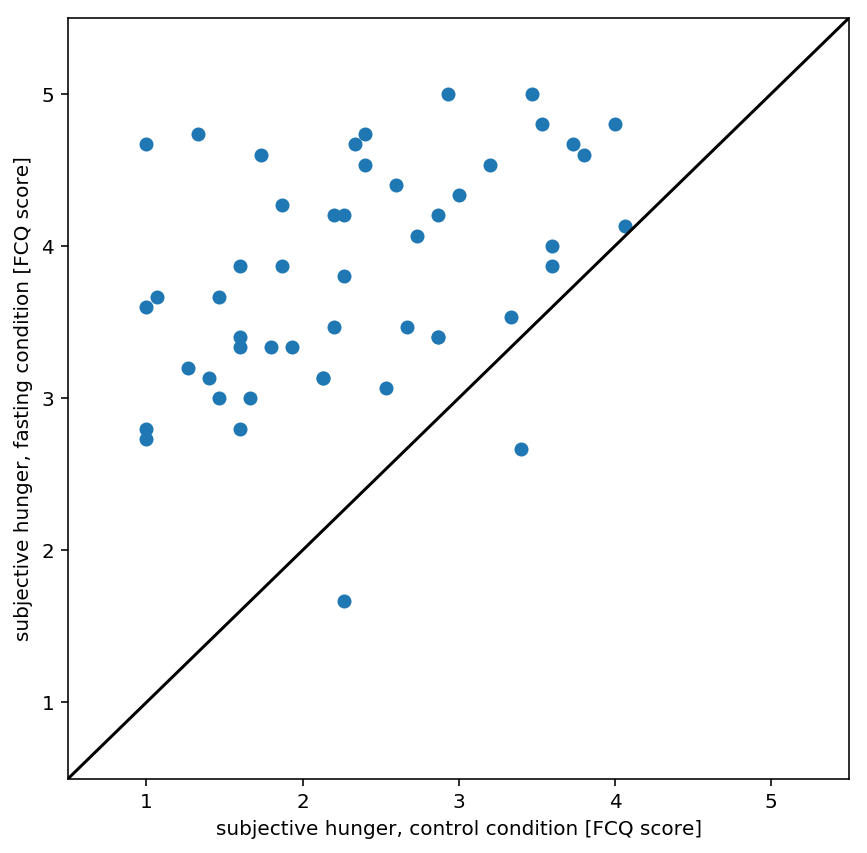

In [5]:
fig, ax = plt.subplots(figsize=(7, 7))

ax.scatter(hunger_control, hunger_fasting)
ax.set(xlabel='subjective hunger, control condition [FCQ score]',
       ylabel='subjective hunger, fasting condition [FCQ score]',
       xlim=[0.5, 5.5], 
       ylim=[0.5, 5.5])
ax.plot([0.5, 5.5], [0.5, 5.5], c='k');

## Effectiveness of fasting manipulation on subjective hunger

In [6]:
paired_diff = dabest.load(data,
                          idx=("control", "fasting"),
                          x="condition", y="fcq", 
                          random_seed=12345,
                          paired=True, id_col='participant')

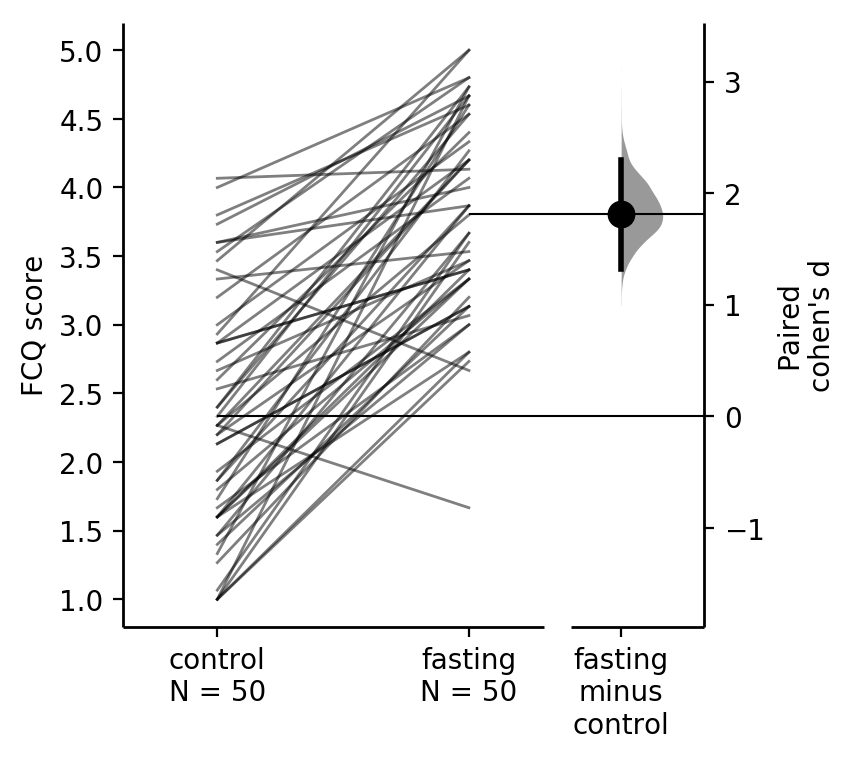

In [7]:
paired_diff.cohens_d.plot(swarm_label="FCQ score");

In [8]:
paired_diff.cohens_d.statistical_tests

,control,test,effect_size,is_paired,difference,ci,bca_low,bca_high,pvalue_wilcoxon,statistic_wilcoxon,pvalue_paired_students_t,statistic_paired_students_t
0,control,fasting,Cohen's d,True,1.815909,95,1.320699,2.293961,2.090335e-09,17.0,9.372124e-16,-11.669814
